## Clusters Jerárquicos

In [30]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%ls

'Clase 15.ipynb'                                   customers_data.csv
'Clase 15 - Modelos Analíticos para DS III.docx'   data_vinos.csv
'Clase 15 - Modelos Analíticos para DS III.pptx'   Mall_Customers.csv
 Cluster_jerarquico.ipynb                         'NoSupervisado (1).ipynb'


In [31]:
%cd /content/drive/MyDrive/CoderHouse/46300/Clase 15 - Modelos analíticos para DS III/

/content/drive/MyDrive/CoderHouse/46300/Clase 15 - Modelos analíticos para DS III


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('customers_data.csv')
data = data.drop(['Channel', 'Region'], axis = 1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [35]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Primero vamos a normalizar la informacion

In [36]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)


In [37]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()
# data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Dendograma

Vamos a crear el dendograma, lo cual nos servira para observar cual es la cantidad de grupos que queramos tener.

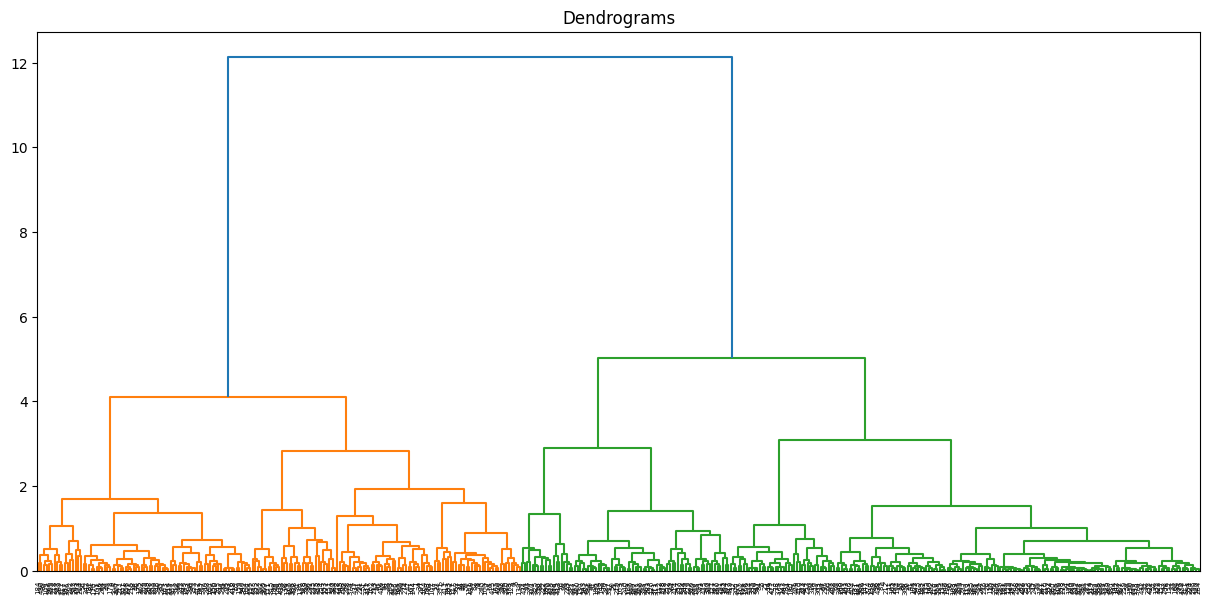

In [38]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))

plt.title("Dendrograms")

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
# El método de enlace de Ward es un enfoque común para el agrupamiento jerárquico que minimiza la varianza dentro de los grupos.

### Cuantos cluster elegimos?

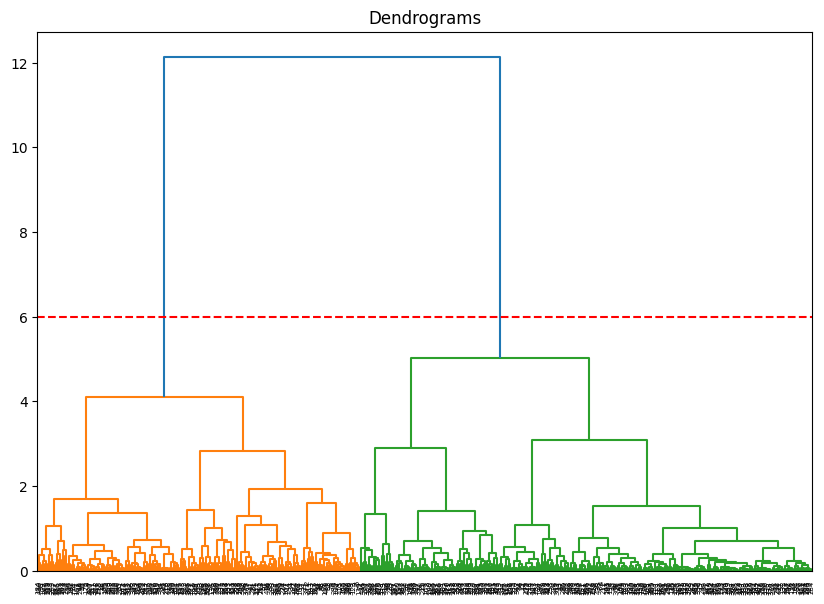

In [39]:
plt.figure(figsize=(10, 7))

plt.title("Dendrograms")

z = shc.linkage(data_scaled, method='ward')
# z calcula la matriz de enlace utilizando el método de enlace "ward".
# La matriz de enlace se utiliza para construir el dendrograma y representa cómo se agrupan los puntos de datos a medida que se fusionan en clusters.
# El método de enlace "ward" minimiza la varianza al unir dos clusters, lo que lo hace adecuado para datos de tipo numérico.

dend = shc.dendrogram( z )

plt.axhline(y=4, color='r', linestyle='--')

plt.show()

In [40]:
# Supongamos que decidimos trabajar con 4 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

In [41]:
cluster.fit_predict(data_scaled)
cluster.labels_

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [42]:
# Agregamos esta variable al dataset original
data['Cluster'] = cluster.labels_


In [43]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0


In [27]:
# Para fines analíticos podemos filtrar los datos según la pertenencia del cluster
cluster_1_data = data[data['Cluster'] == 1]
cluster_1_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,6887.598039,10434.666667,10376.803922,1953.852941,4109.980392,2271.960784,1.0
std,7538.238705,10919.635383,10096.784221,3855.485852,4945.150794,5041.317979,0.0
min,140.000000,577.000000,223.000000,33.000000,68.000000,3.000000,1.0
25%,2369.500000,4604.250000,3289.750000,545.750000,658.000000,701.500000,1.0
50%,4757.000000,7579.000000,8161.000000,982.000000,3113.500000,1259.000000,1.0
75%,9346.500000,11111.250000,12387.750000,2167.500000,5267.250000,2005.250000,1.0
max,44466.000000,73498.000000,59598.000000,36534.000000,26701.000000,47943.000000,1.0


In [44]:
cluster_0_data = data[data['Cluster'] == 0]
cluster_0_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
mean,19932.769663,3072.612360,4426.348315,2300.943820,1034.674157,1433.264045,0.0
std,14548.104540,3180.765384,3752.068170,2683.460856,1281.722118,1928.417832,0.0
min,622.000000,55.000000,3.000000,47.000000,3.000000,3.000000,0.0
25%,10262.250000,1127.250000,1703.750000,810.500000,193.750000,405.000000,0.0
50%,16589.500000,2064.000000,3091.000000,1469.000000,472.500000,820.500000,0.0
75%,24841.250000,3938.500000,6201.250000,2888.500000,1448.000000,1846.500000,0.0
max,112151.000000,29627.000000,21042.000000,18028.000000,6707.000000,14472.000000,0.0


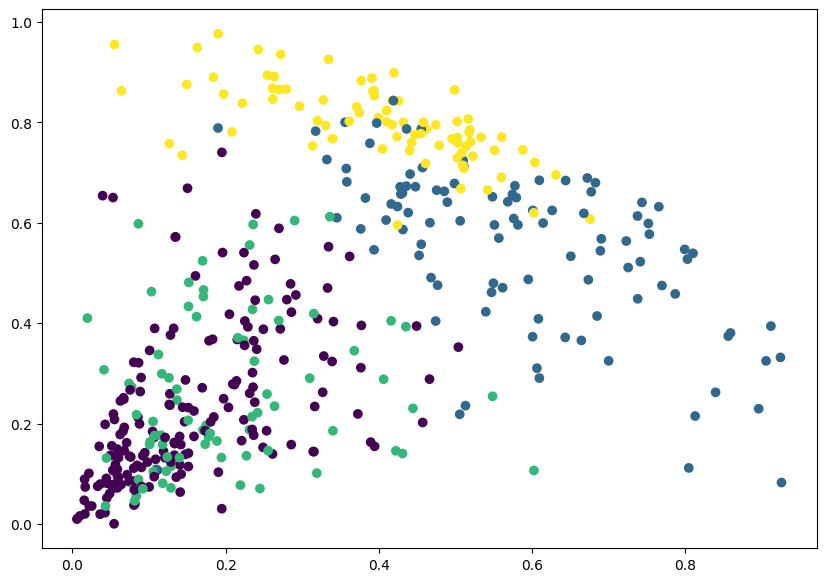

In [45]:
# Veamos la data normalizada
plt.figure(figsize=(10, 7))

plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

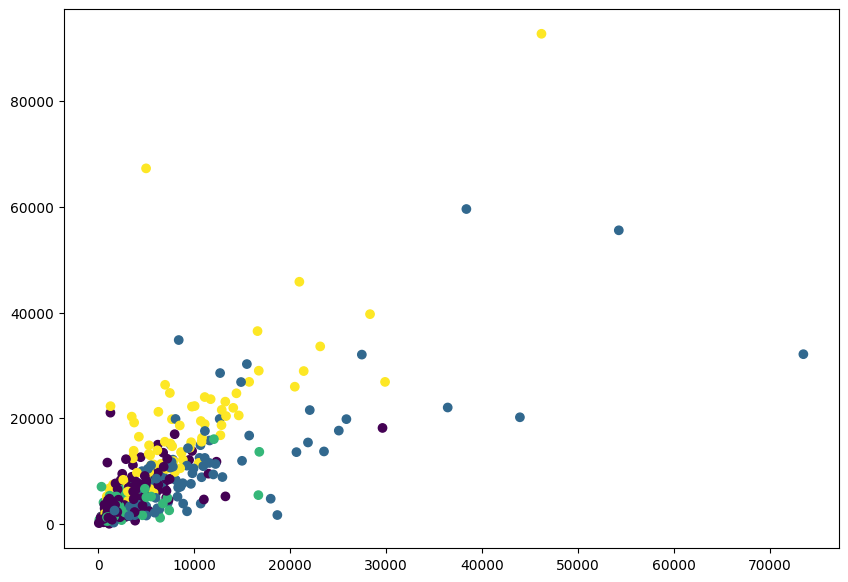

In [46]:
# Comparemos con los datos originales
plt.figure(figsize=(10, 7))

plt.scatter(data['Milk'], data['Grocery'], c=cluster.labels_)